<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-29.2" data-toc-modified-id="Figure-29.2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 29.2</a></span></li><li><span><a href="#Figure-29.3" data-toc-modified-id="Figure-29.3-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 29.3</a></span></li><li><span><a href="#Figure-29.4" data-toc-modified-id="Figure-29.4-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figure 29.4</a></span></li><li><span><a href="#Figure-29.5" data-toc-modified-id="Figure-29.5-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Figure 29.5</a></span></li><li><span><a href="#Figure-29.6" data-toc-modified-id="Figure-29.6-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Figure 29.6</a></span></li><li><span><a href="#Figure-29.7" data-toc-modified-id="Figure-29.7-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Figure 29.7</a></span></li><li><span><a href="#Figure-29.8" data-toc-modified-id="Figure-29.8-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Figure 29.8</a></span></li><li><span><a href="#Figure-29.9" data-toc-modified-id="Figure-29.9-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Figure 29.9</a></span></li><li><span><a href="#Figure-29.10" data-toc-modified-id="Figure-29.10-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Figure 29.10</a></span></li><li><span><a href="#Figure-29.11" data-toc-modified-id="Figure-29.11-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Figure 29.11</a></span></li><li><span><a href="#Figure-29.12" data-toc-modified-id="Figure-29.12-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Figure 29.12</a></span></li></ul></div>

In [1]:
## Analyzing Neural Time Series Data
# Python code for Chapter 29
# Yujin Goto (MATLAB original code: Mike X Cohen)
# 
# This code accompanies the book, titled "Analyzing Neural Time Series Data" 
# (MIT Press). Using the code without following the book may lead to confusion, 
# incorrect data analyses, and misinterpretations of results. 
# Mike X Cohen and Yujin Goto assumes no responsibility for inappropriate or incorrect use of this code. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats

from mutualinformationx import mutualinformationx # converted Cohen's mutualinformationx func.

import mne
from mne import events_from_annotations

In [3]:
# load EEG data (.vhdr converted ver. by Yujin)
mne.set_log_level('CRITICAL') # delete this line for your environment
raw = mne.io.read_raw_brainvision('./NeuralData/sampleEEGdata_convert.vhdr', eog=['HEOG', 'VEOG'], preload=True)
mne.set_log_level('INFO') # delete this line for your environment

# load electrodes location montage
montage = mne.channels.read_custom_montage('./NeuralData/sampleEEG_loc.loc')
raw.set_montage(montage)

# Getting event timings (for .mat file, you don't have to do this.) and epoching
events, event_dict = events_from_annotations(raw)

epochs = mne.Epochs(
    raw,
    events,
    event_id = {'New Segment/': 99999},
    tmin = 0,
    tmax = 2.496,
    baseline = None,
)

# Extract variables
data = epochs.get_data()*(10**6)                 # EEG data (array; trial, ch, time). MNE-pyton reads data in volts(V), not microvolts (μV).
pnts = data.shape[2]                             # Number of points in EEG data (scalar)
times = epochs.times-1                           # Time points of data (array)
tmin = epochs.tmin-1                             # The start timing of epoch (the start timing of the baseline is set to be 0 in default)
tmax = epochs.tmax-1                             # The end timing of epoch
srate = epochs.info['sfreq']                     # Sampling rate (scalar)
trials = len(epochs.events)                      # Trials (scalar)
nbchan = len(epochs.ch_names)                    # Number of channel (scalar)


chan_labels = epochs.info['ch_names']

# channel locations
chan_pos2D = []
chan_pos3D = []
for ch in epochs.info['chs']:
    x,y,z = ch['loc'][:3]
    chan_pos2D.append((x,y))
    chan_pos3D.append((x,y,z))
    
#chan2useidx = chan_labels.index('Pz')

Used Annotations descriptions: ['New Segment/', 'Stimulus/1', 'Stimulus/2', 'Stimulus/31', 'Stimulus/32', 'Stimulus/51', 'Stimulus/52']
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 99 events and 640 original time points ...
0 bad epochs dropped


## Figure 29.2

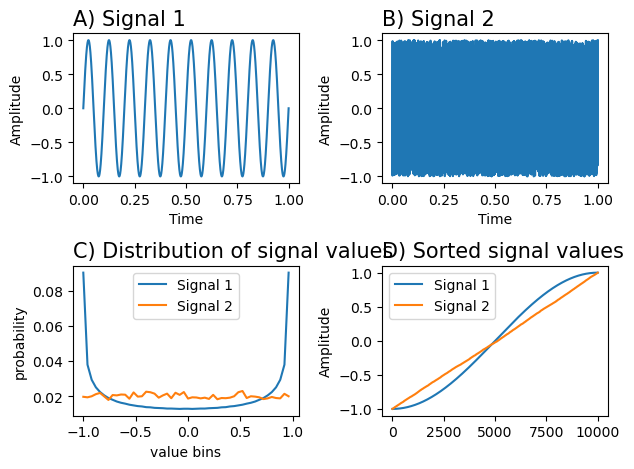

In [4]:
# create two signals
time = np.linspace(0,1,10000)
signal1 = np.sin(2*np.pi*10*time)
signal2 = np.random.rand(len(signal1)) * 2 - 1 # uniform random numbers in the same scale as the sine wave

# plot signals
plt.subplot(221)
plt.plot(time, signal1)
plt.setp(plt.gca(), 'xlabel', 'Time', 'ylabel','Amplitude')
plt.title('A) Signal 1', loc='left', fontsize=15)

plt.subplot(222)
plt.plot(time, signal2)
plt.setp(plt.gca(), 'xlabel', 'Time', 'ylabel','Amplitude')
plt.title('B) Signal 2', loc='left', fontsize=15)

# bin data using histogram func
nbins = 50
hist_1 = np.histogram(signal1, nbins)
hist_2 = np.histogram(signal2, nbins)

# convert histograms to probability values
hdat1 = hist_1[0] / np.sum(hist_1[0])
hdat2 = hist_2[0] / np.sum(hist_2[0])

# plot histograms
plt.subplot(223)
plt.plot(hist_1[1][:-1], hdat1)
plt.plot(hist_2[1][:-1], hdat2)
plt.setp(plt.gca(), 'xlabel', 'value bins', 'ylabel', 'probability')
plt.legend(['Signal 1', 'Signal 2'])
plt.title('C) Distribution of signal values', loc='left', fontsize=15)

plt.subplot(224)
plt.plot(np.sort(signal1))
plt.plot(np.sort(signal2))
plt.setp(plt.gca(), 'ylabel', 'Amplitude')
plt.legend(['Signal 1', 'Signal 2'])
plt.title('D) Sorted signal values', loc='left', fontsize=15)

plt.tight_layout()

## Figure 29.3

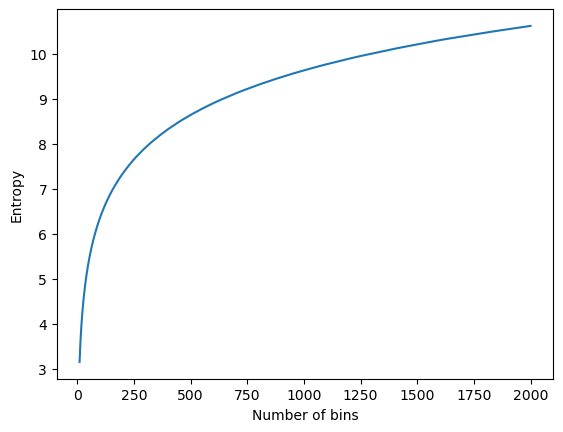

In [5]:
# range of bin numbers
nbins = np.arange(10,2000,1)

# initialize array
entropyByBinSize = np.zeros(len(nbins))

for ii, nbini in enumerate(nbins):
    # bin data, transform to probability, and eliminate zeros
    hist = np.histogram(signal1, nbini)
    hdat = hist[0] / np.sum(hist[0])

    # compute entropy
    entropyByBinSize[ii] = -np.sum(hdat * np.log2(hdat + 1E-6))
    
plt.plot(nbins, entropyByBinSize)
_=plt.setp(plt.gca(), 'xlabel', 'Number of bins', 'ylabel', 'Entropy')

## Figure 29.4

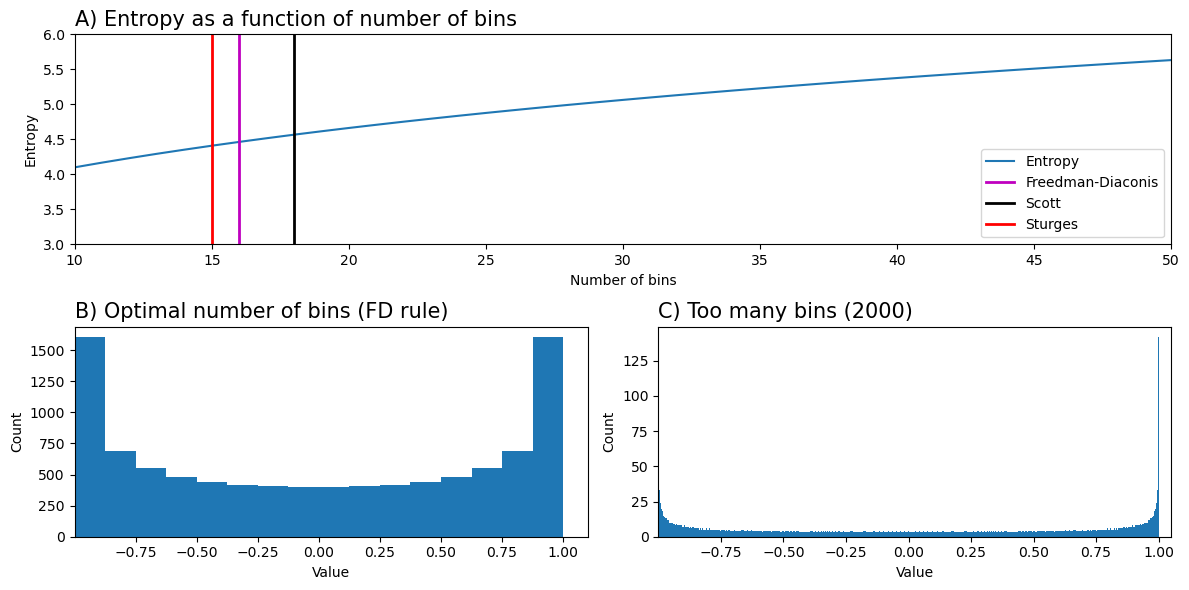

In [6]:
# optimal number of bins for histogram based on a few different guidelines
n = len(signal1)
maxmin_range = np.max(signal1) - np.min(signal1)

# note: the function iqr (inter-quartile range) is in the stats toolbox. 
# If you don't have this toolbox, you can write your own similar function
# by sorting the values, finding the values that are 25% and 75% of the
# sorted distribution, and then subtracting the 25% number from the 75% number.
fd_bins      = np.ceil(maxmin_range/(2.0*stats.iqr(signal1)*n**(-1/3))) # Freedman-Diaconis
scott_bins   = np.ceil(maxmin_range/(3.5*np.std(signal1)*n**(-1/3))) # Scott
sturges_bins = np.ceil(1+np.log2(n)) # Sturges


plt.figure(figsize=(12, 6))
# plot up to 50 bins
plt.subplot(211)
plt.plot(entropyByBinSize)
plt.axvline(x=fd_bins, color='m', linewidth=2)
plt.axvline(x=scott_bins, color='k', linewidth=2)
plt.axvline(x=sturges_bins, color='r', linewidth=2)
plt.legend(['Entropy', 'Freedman-Diaconis', 'Scott', 'Sturges'])
plt.setp(plt.gca(), 'xlabel', 'Number of bins', 'ylabel', 'Entropy', 'xlim', [10, 50], 'ylim', [3, 6])
plt.title('A) Entropy as a function of number of bins', loc='left', fontsize=15)

plt.subplot(223)
plt.hist(signal1, bins=int(fd_bins), edgecolor='none')
plt.xlim([np.min(signal1), np.max(signal1) * 1.1])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('B) Optimal number of bins (FD rule)', loc='left', fontsize=15)

plt.subplot(224)
plt.hist(signal1, bins=2000, edgecolor='none')
plt.xlim([np.min(signal1), np.max(signal1) * 1.05])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('C) Too many bins (2000)', loc='left', fontsize=15)

plt.tight_layout()

## Figure 29.5

In [7]:
def calculate_entropy(data, bins=25):
    hist = np.histogram(data, bins=bins)
    hdat = hist[0] / np.sum(hist[0])
    return -np.sum(hdat * np.log2(hdat + 1E-6))

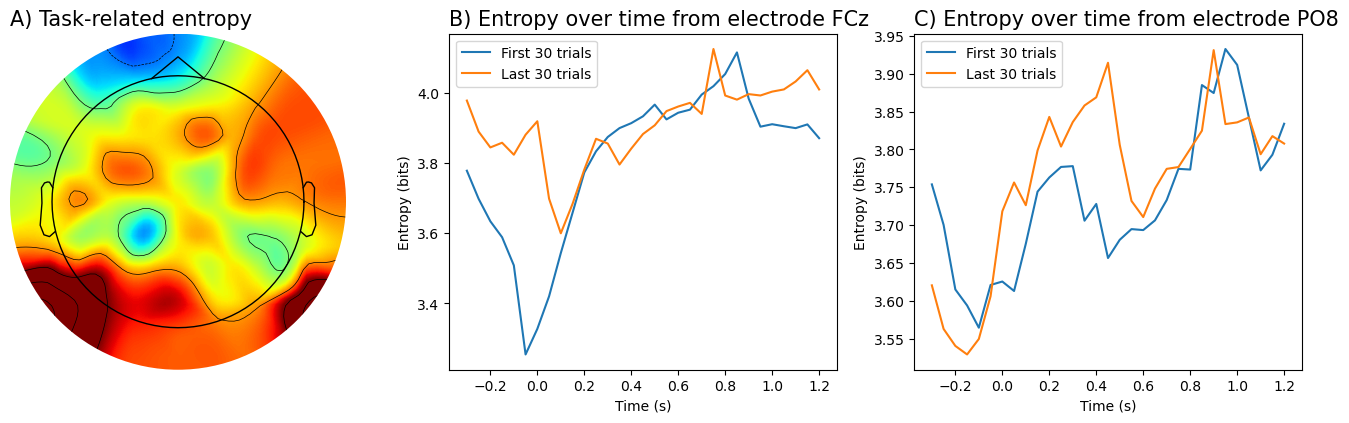

In [8]:
# entropy over all sensors
time4entropy = [  .1,  .4 ] # in s
base4entropy = [ -.4, -.1 ] # in s
topo_entropy = np.zeros(nbchan)

timeidx = [np.argmin(np.abs(times - t)) for t in time4entropy]
baseidx = [np.argmin(np.abs(times - t)) for t in base4entropy]

for chani in range(nbchan):
    task_entropy = calculate_entropy(data[:, chani, timeidx[0]:timeidx[1]])
    base_entropy = calculate_entropy(data[:, chani, baseidx[0]:baseidx[1]])
    topo_entropy[chani] = task_entropy - base_entropy

fig, ax = plt.subplots(1, 3, figsize=(17, 4))
mne.viz.plot_topomap(topo_entropy, epochs.info, axes=ax[0],vlim=(-0.5, 0.5), cmap='jet', sensors=False, show=False)
ax[0].set_title('A) Task-related entropy', loc='left', fontsize=15)


sensor4entropy = 'FCz'
times2save = np.arange(-.3, 1.201, .050)
timewindow = 400  # ms
timewindowidx = round(timewindow / (1000 / srate) / 2)
times2saveidx = [np.argmin(np.abs(times - t)) for t in times2save]
electrodeidx = chan_labels.index(sensor4entropy)

timeEntropy = np.zeros((2, len(times2save)))

for timei, tidx in enumerate(times2saveidx):
    tempdata = data[:30, electrodeidx, tidx - timewindowidx:tidx + timewindowidx]
    timeEntropy[0, timei] = calculate_entropy(tempdata.flatten())
    tempdata = data[-30:, electrodeidx, tidx - timewindowidx:tidx + timewindowidx]
    timeEntropy[1, timei] = calculate_entropy(tempdata.flatten())

ax[1].plot(times2save, timeEntropy[0, :], label='First 30 trials')
ax[1].plot(times2save, timeEntropy[1, :], label='Last 30 trials')
ax[1].set(xlabel='Time (s)', ylabel='Entropy (bits)')
ax[1].legend()
_=ax[1].set_title(f'B) Entropy over time from electrode {sensor4entropy}', loc='left', fontsize=15)

sensor4entropy = 'PO8'
electrodeidx = chan_labels.index(sensor4entropy)

for timei, tidx in enumerate(times2saveidx):
    tempdata = data[:30, electrodeidx, tidx - timewindowidx:tidx + timewindowidx]
    timeEntropy[0, timei] = calculate_entropy(tempdata.flatten())
    tempdata = data[-30:, electrodeidx, tidx - timewindowidx:tidx + timewindowidx]
    timeEntropy[1, timei] = calculate_entropy(tempdata.flatten())

ax[2].plot(times2save, timeEntropy[0, :], label='First 30 trials')
ax[2].plot(times2save, timeEntropy[1, :], label='Last 30 trials')
ax[2].set(xlabel='Time (s)', ylabel='Entropy (bits)')
ax[2].legend()
_=ax[2].set_title(f'C) Entropy over time from electrode {sensor4entropy}', loc='left', fontsize=15)

## Figure 29.6

In [9]:
def getting_fdbins(signal1, signal2):
    n1 = len(signal1)
    maxmin_range1 = np.max(signal1) - np.min(signal1)
    fd_bins1 = np.ceil(maxmin_range1 / (2.0 * stats.iqr(signal1) * n1 ** (-1/3)))

    n2 = len(signal2)
    maxmin_range2 = np.max(signal2) - np.min(signal2)
    fd_bins2 = np.ceil(maxmin_range2 / (2.0 * stats.iqr(signal2) * n2 ** (-1/3)))
    
    # and use the average...
    fd_bins = np.ceil((fd_bins1 + fd_bins2) / 2)
    
    return fd_bins

def joint_probs(signal1, signal2):
    fd_bins = getting_fdbins(signal1, signal2)
    # bin data
    edges1 = np.linspace(np.min(signal1), np.max(signal1), int(fd_bins) + 1)
    n_per_bin1, _ = np.histogram(signal1, edges1)

    edges2 = np.linspace(np.min(signal2), np.max(signal2), int(fd_bins) + 1)
    n_per_bin2, _ = np.histogram(signal2, edges2)

    # compute joint frequency table
    jointprobs = np.zeros((int(fd_bins), int(fd_bins)))
    for i1 in range(int(fd_bins)):
        for i2 in range(int(fd_bins)):
            jointprobs[i1, i2] = np.sum((np.digitize(signal1, edges1) == i1 + 1) & (np.digitize(signal2, edges2) == i2 + 1))
    jointprobs = jointprobs / np.sum(jointprobs)
    
    return edges1, edges2, jointprobs

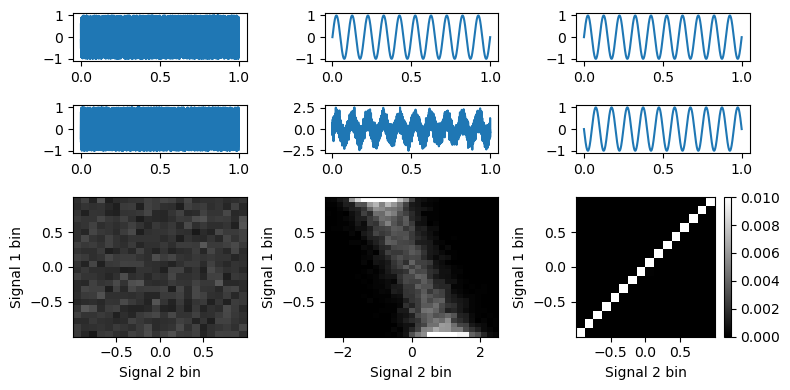

In [10]:
# Note about this figure: The panels use the same code but with different
# input signals. Comment out some of the lines below to recreate each panel.

fig = plt.figure(figsize = (8,4), tight_layout=True)
gs = fig.add_gridspec(4, 6)
ax11 = fig.add_subplot(gs[0, 0:2])
ax21 = fig.add_subplot(gs[1, 0:2])
ax31 = fig.add_subplot(gs[2:4, 0:2])

ax12 = fig.add_subplot(gs[0, 2:4])
ax22 = fig.add_subplot(gs[1, 2:4])
ax32 = fig.add_subplot(gs[2:4, 2:4])

ax13 = fig.add_subplot(gs[0, 4:6])
ax23 = fig.add_subplot(gs[1, 4:6])
ax33 = fig.add_subplot(gs[2:4, 4:6])


# left panel: random noise
signal1 = np.random.rand(len(time))*2-1
signal2 = np.random.rand(len(time))*2-1

ax11.plot(time, signal1)
ax21.plot(time, signal2)

edges1, edges2, jointprobs = joint_probs(signal1,signal2)

im = ax31.imshow(jointprobs, cmap='gray', aspect='auto', clim=[0,0.01], extent=[edges2[0], edges2[-1], edges1[0], edges1[-1]])

ax31.set(xlabel='Signal 2 bin', ylabel='Signal 1 bin')

# center panel: one pure sine wave and one sine wave plus random noise
signal1 = np.sin(2*np.pi*10*time)
signal2 = signal1 + np.random.randn(len(time))/2

ax12.plot(time, signal1)
ax22.plot(time, signal2)

edges1, edges2, jointprobs = joint_probs(signal1,signal2)

im = ax32.imshow(jointprobs, cmap='gray', aspect='auto', clim=[0,0.01], extent=[edges2[0], edges2[-1], edges1[0], edges1[-1]])

ax32.set(xlabel='Signal 2 bin', ylabel='Signal 1 bin')


# right panel: one pure sine wave and its inverse
signal1 = np.sin(2*np.pi*10*time)
signal2 = -signal1
ax13.plot(time, signal1)
ax23.plot(time, signal2)

edges1, edges2, jointprobs = joint_probs(signal1,signal2)

im = ax33.imshow(jointprobs, cmap='gray', aspect='auto', clim=[0,0.01], extent=[edges2[0], edges2[-1], edges1[0], edges1[-1]])
fig.colorbar(im, ax=ax33)

_=ax33.set(xlabel='Signal 2 bin', ylabel='Signal 1 bin')

## Figure 29.7

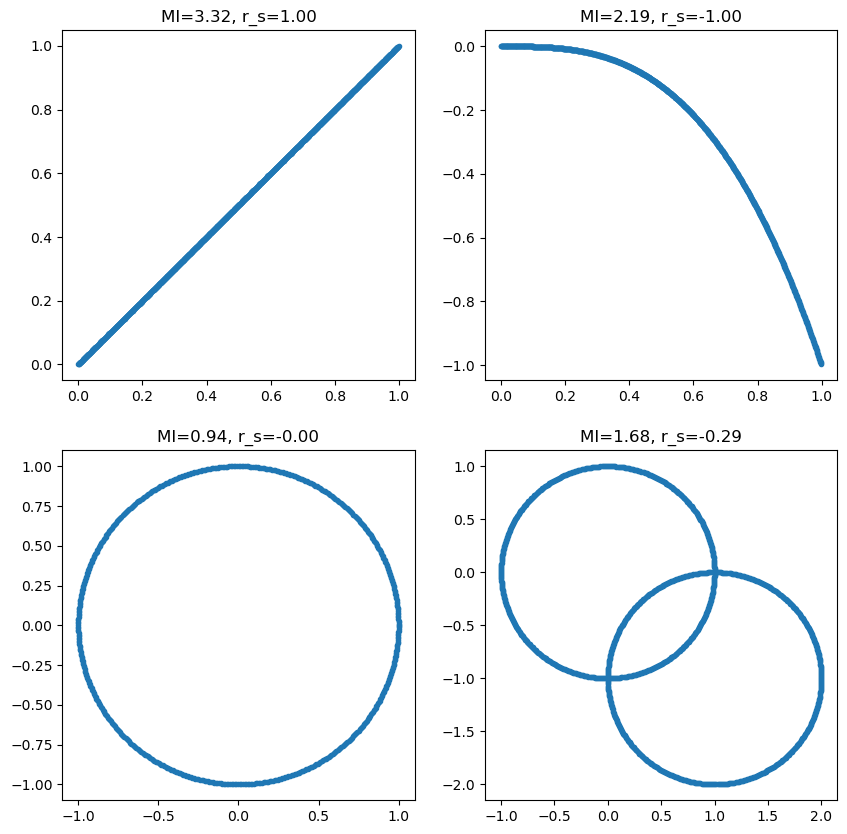

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

x = np.arange(0, 1, 0.001)
y = x
axs[0, 0].plot(x, y, '.')
axs[0, 0].set_title(f'MI={mutualinformationx(x, y)[0]:.2f}, r_s={stats.spearmanr(x, y)[0]:.2f}')


x = np.arange(0, 1, 0.001)
y = -x**3
axs[0, 1].plot(x, y, '.')
axs[0, 1].set_title(f'MI={mutualinformationx(x, y)[0]:.2f}, r_s={stats.spearmanr(x, y)[0]:.2f}')


x = np.cos(np.arange(0, 2*np.pi, 0.01))
y = np.sin(np.arange(0, 2*np.pi, 0.01))
axs[1, 0].plot(x, y, '.')
axs[1, 0].set_title(f'MI={mutualinformationx(x, y)[0]:.2f}, r_s={stats.spearmanr(x, y)[0]:.2f}')


x = np.concatenate([np.cos(np.arange(0, 2*np.pi, 0.01)), np.cos(np.arange(0, 2*np.pi, 0.01)) + 1])
y = np.concatenate([np.sin(np.arange(0, 2*np.pi, 0.01)), np.sin(np.arange(0, 2*np.pi, 0.01)) - 1])
axs[1, 1].plot(x, y, '.')
_=axs[1, 1].set_title(f'MI={mutualinformationx(x, y)[0]:.2f}, r_s={stats.spearmanr(x, y)[0]:.2f}')

## Figure 29.8

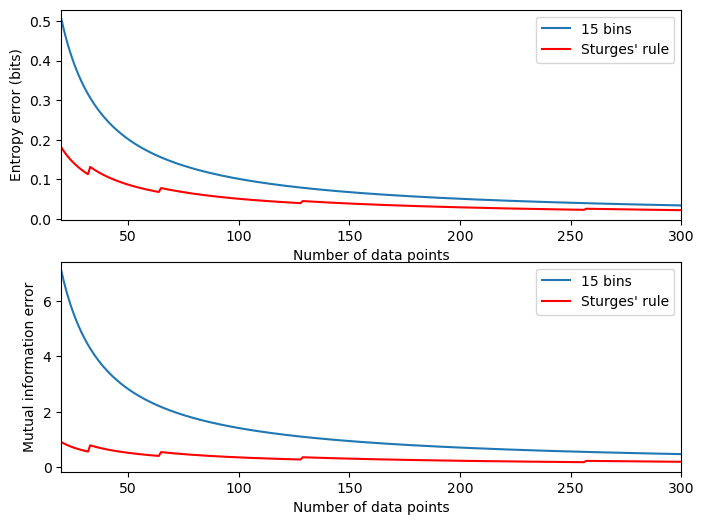

In [12]:

# Define the error functions
def entropy_error(b, n):
    return (b - 1) / (2. * n * np.log(2))

def mutinfo_error(b, n):
    return (b - 1) ** 2 / (2. * n * np.log(2))

# Number of data points
n = np.arange(20, 301)
nfixed = 15

# Set up the figure and subplots
plt.figure(figsize=(8,6))

# Subplot for Entropy Error
plt.subplot(211)
plt.plot(n, entropy_error(nfixed, n), label=f'{nfixed} bins')
plt.plot(n, entropy_error(np.ceil(1 + np.log2(n)), n), 'r', label="Sturges' rule")
plt.legend()
plt.setp(plt.gca(), 'xlim', [n[0], n[-1]], 'xlabel', 'Number of data points', 'ylabel', 'Entropy error (bits)')

# Subplot for Mutual Information Error
plt.subplot(212)
plt.plot(n, mutinfo_error(nfixed, n), label=f'{nfixed} bins')
plt.plot(n, mutinfo_error(np.ceil(1 + np.log2(n)), n), 'r', label="Sturges' rule")
plt.legend()
_=plt.setp(plt.gca(), 'xlim', [n[0], n[-1]], 'xlabel', 'Number of data points', 'ylabel', 'Mutual information error')

## Figure 29.9

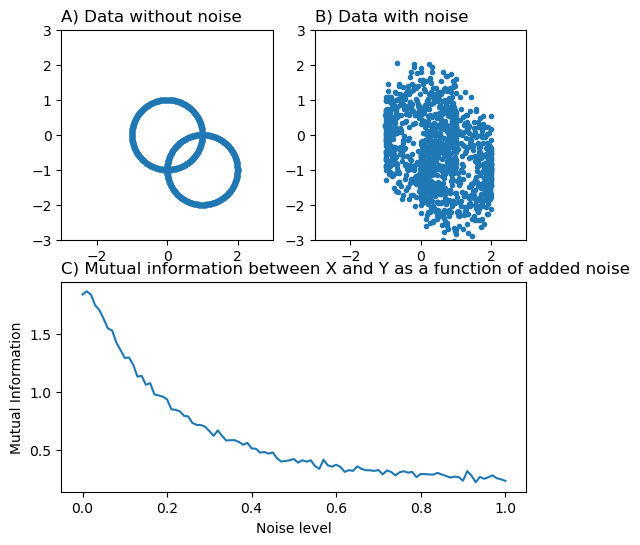

In [13]:
x = np.concatenate([np.cos(np.arange(0, 2*np.pi, 0.01)), np.cos(np.arange(0, 2*np.pi, 0.01)) + 1])
y = np.concatenate([np.sin(np.arange(0, 2*np.pi, 0.01)), np.sin(np.arange(0, 2*np.pi, 0.01)) - 1])

plt.figure(figsize=(6,6))

plt.subplot(221)
plt.plot(x, y, '.')
plt.setp(plt.gca(), 'xlim', [-3, 3], 'ylim', [-3, 3])
plt.title('A) Data without noise', loc='left')

plt.subplot(212)
noiselevels = np.arange(0, 1.01, 0.01)
mi = np.zeros(noiselevels.shape)
for ni in range(len(noiselevels)):
    mi[ni] = mutualinformationx(x, y + np.random.randn(*y.shape) * noiselevels[ni], fd_bins=20)[0]

plt.plot(noiselevels, mi)
plt.setp(plt.gca(), 'xlabel', 'Noise level', 'ylabel', 'Mutual Information')
plt.title('C) Mutual information between X and Y as a function of added noise', loc='left')

# Subplot for x and noisy y plot
plt.subplot(222)
plt.plot(x, y + np.random.randn(*y.shape) * noiselevels[len(noiselevels) // 2], '.')
plt.setp(plt.gca(), 'xlim', [-3, 3], 'ylim', [-3, 3])
_=plt.title('B) Data with noise', loc='left')

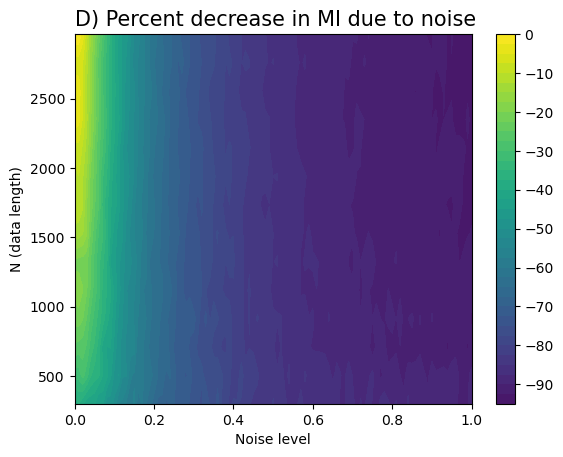

In [14]:
nrange = np.arange(300, 3001, 205)
noiselevels = np.arange(0, 1.01, 0.01)

mi = np.zeros((len(nrange), len(noiselevels)))
b = np.zeros(len(nrange))  # number of histogram bins

for ni in range(len(nrange)):
    # define time
    t = np.linspace(0, 2 * np.pi, nrange[ni])
    # define signals
    x = np.concatenate([np.cos(t), np.cos(t) + 1])
    y = np.concatenate([np.sin(t), np.sin(t) - 1])

    for noi in range(len(noiselevels)):
        noisy_y = y + np.random.randn(*y.shape) * noiselevels[noi]
        if noi == 0:  # keep number of bins constant across noise levels within each number of points
            mi[ni, noi], _, b[ni] = mutualinformationx(x, noisy_y)
        else:
            mi[ni, noi] = mutualinformationx(x, noisy_y, int(b[ni]))[0]

# Convert to % change from best-case scenario (no noise, large N)
mip = 100. * (mi - mi[-1, 0]) / mi[-1, 0]

# Plotting
plt.figure()
cp = plt.contourf(noiselevels, nrange, mip, 40, linestyles='none')
plt.colorbar(cp)
plt.clim(-100, 0)
plt.xlabel('Noise level')
plt.ylabel('N (data length)')
_=plt.title('D) Percent decrease in MI due to noise', loc='left', fontsize=15)

## Figure 29.10

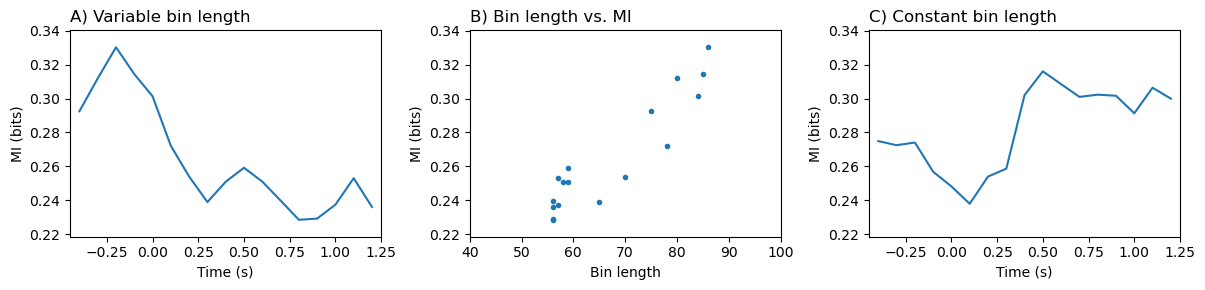

In [15]:
electrodes4mi = ['Fz', 'O1']
timewindow = 400  # in ms
times2save = np.arange(-.4, 1.201, .1)
electrodesidx = np.zeros(2).astype(int)

# Convert ms to indices
timewindowidx = round(timewindow / (1000 / srate) / 2)
times2saveidx = [np.argmin(abs(times - t)) for t in times2save]

electrodesidx[0] = chan_labels.index(electrodes4mi[0])
electrodesidx[1] = chan_labels.index(electrodes4mi[1])

# Initialize outputs
entropy = np.zeros((3, len(times2save)))
mi = np.zeros((2, len(times2save)))
nbins = np.zeros(len(times2save))

for timei in range(len(times2save)):
    datax = data[:, electrodesidx[0], times2saveidx[timei] - timewindowidx:times2saveidx[timei] + timewindowidx]
    datay = data[:, electrodesidx[1], times2saveidx[timei] - timewindowidx:times2saveidx[timei] + timewindowidx]

    mi[0, timei], entropy[:, timei], nbins[timei] = mutualinformationx(datax, datay)
    mi[1, timei], _ , _= mutualinformationx(datax, datay, 70)

plt.figure(figsize=(12,3))


plt.subplot(131)
plt.plot(times2save, mi[0, :])
plt.setp(plt.gca(), 'xlim', [times2save[0] - .05, times2save[-1] + .05], 
         'ylim', [mi.min() - .01, mi.max() + .01], 'xlabel', 'Time (s)', 'ylabel', 'MI (bits)')
plt.title('A) Variable bin length', loc='left')


plt.subplot(132)
plt.plot(nbins, mi[0, :], '.')
plt.setp(plt.gca(), 'xlabel', 'Bin length', 'ylabel', 'MI (bits)', 'xlim', [40, 100], 'ylim', [mi.min() - .01, mi.max() + .01])
plt.title('B) Bin length vs. MI', loc='left')


plt.subplot(133)
plt.plot(times2save, mi[1, :])
plt.setp(plt.gca(), 'xlim', [times2save[0] - .05, times2save[-1] + .05], 
         'ylim', [mi.min() - .01, mi.max() + .01], 'xlabel', 'Time (s)', 'ylabel', 'MI (bits)')
plt.title('C) Constant bin length', loc='left')

plt.tight_layout()

## Figure 29.11

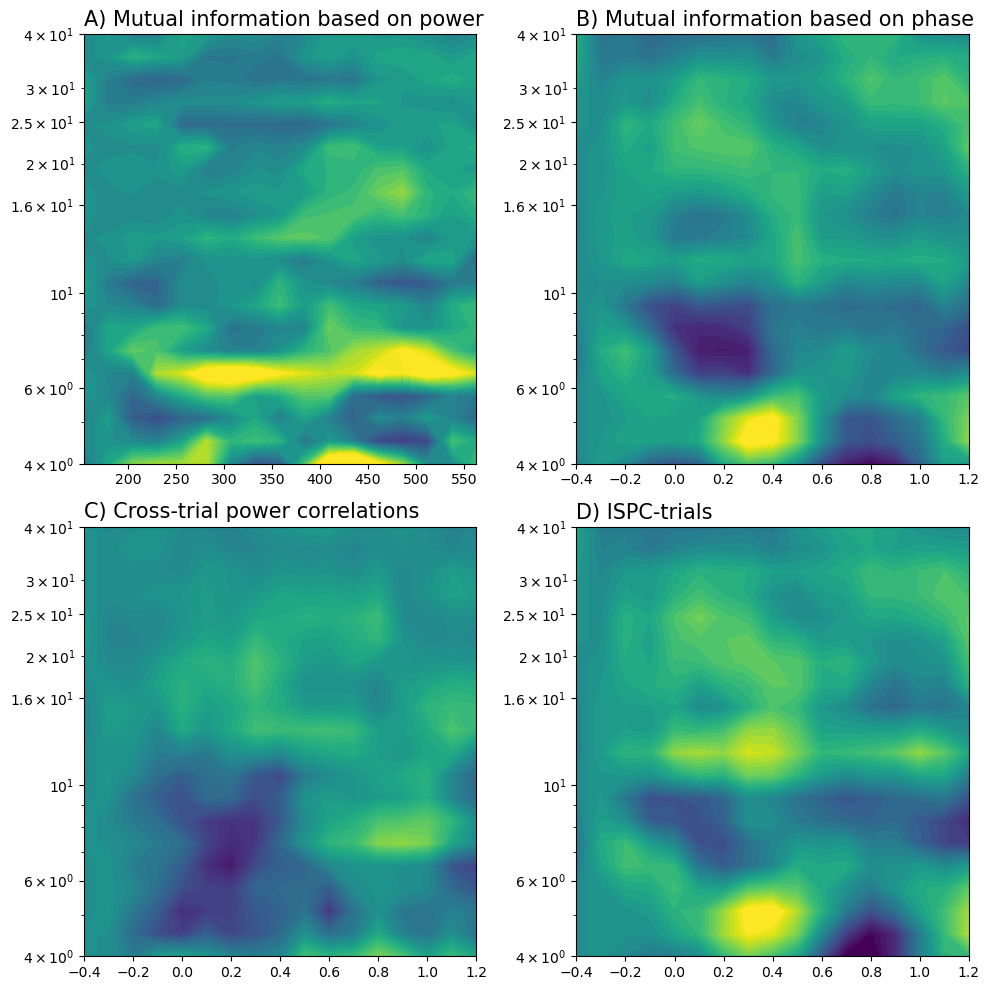

In [16]:
# (Figure 10 must be generated before running this cell.)
frex = np.logspace(np.log10(4), np.log10(40), 20)
baselinetime = [-.5, -.2]


# baseline from ms to idx
baseidx = [np.argmin(abs(times2save - bt)) for bt in baselinetime]

# specify convolution and wavelet info
time = np.arange(-1, 1 + 1/srate, 1/srate)
half_of_wavelet_size = (len(time) - 1) // 2
n_wavelet = len(time)
n_data = pnts * trials
n_convolution = n_wavelet + n_data - 1


# FFT of data
fft_EEG1 = np.fft.fft(data[:, electrodesidx[0], :].flatten(), n_convolution)
fft_EEG2 = np.fft.fft(data[:, electrodesidx[1], :].flatten(), n_convolution)



# initialize outputs
mi = np.zeros((2, len(frex), len(times2save)))
ispc = np.zeros((len(frex), len(times2save)))
powc = np.zeros((len(frex), len(times2save)))

for fi in range(len(frex)):
    # Create wavelet and get its FFT
    fft_wavelet = np.fft.fft(np.exp(2 * 1j * np.pi * frex[fi] * time) * np.exp(-time ** 2 / (2 * (4 / (2 * np.pi * frex[fi])) ** 2)), n_convolution)

    # Convolution of each electrode with wavelet
    convres = np.fft.ifft(fft_wavelet * fft_EEG1, n_convolution)
    analytic1 = np.reshape(convres[half_of_wavelet_size:-half_of_wavelet_size], [pnts, trials], order='F')
    convres = np.fft.ifft(fft_wavelet * fft_EEG2, n_convolution)
    analytic2 = np.reshape(convres[half_of_wavelet_size:-half_of_wavelet_size], [pnts, trials], order='F')


    for timei in range(len(times2save)):
        datax = analytic1[times2saveidx[timei] - timewindowidx:times2saveidx[timei] + timewindowidx, :]
        datay = analytic2[times2saveidx[timei] - timewindowidx:times2saveidx[timei] + timewindowidx, :]

        # compute MI
        mi[0, fi, timei] = mutualinformationx(np.log10(abs(datax) ** 2), np.log10(abs(datay) ** 2), 50)[0]
        mi[1, fi, timei] = mutualinformationx(np.angle(datax), np.angle(datay), 20)[0]

        # also compute ISPC-time for comparison
        ispc[fi, timei] = np.mean(np.abs(np.mean(np.exp(1j * (np.angle(datay) - np.angle(datax))), axis=1)))

        # also compute power correlations-time
        dataxr = stats.rankdata(np.abs(datax), axis=0)
        datayr = stats.rankdata(np.abs(datay), axis=0)
        n = timewindowidx * 2 + 1
        powc[fi, timei] = np.mean(1 - 6 * np.sum((dataxr - datayr) ** 2, axis=1) / (n * (n ** 2 - 1)))

    #print(f'Finished frequency {fi + 1} out of {len(frex)}')



# Create the figure and set its title
plt.figure(figsize=(10,10))

# Define common settings for contour plots
contour_settings = {'levels': 40, 'linestyles': 'none'}

# Plot baseline-subtracted corrected MI for each data type
plt.subplot(2, 2, 1)
baseline = np.mean(mi[0, :, baseidx[0]:baseidx[1]], axis=1)
corrected_mi = mi[0, :, :] - np.tile(baseline[:, None], (1, len(times2save)))
plt.contourf(times2saveidx, frex, corrected_mi, **contour_settings)
plt.clim(-0.075, 0.075)
plt.yscale('log')
plt.yticks(np.round(np.logspace(np.log10(frex[0]), np.log10(frex[-1]), 6)))
plt.title('A) Mutual information based on power', loc='left', fontsize=15)

plt.subplot(2, 2, 2)
baseline = np.mean(mi[1, :, baseidx[0]:baseidx[1]], axis=1)
corrected_mi = mi[1, :, :] - np.tile(baseline[:, None], (1, len(times2save)))
plt.contourf(times2save, frex, corrected_mi, **contour_settings)
plt.clim(-0.075, 0.075)
plt.yscale('log')
plt.yticks(np.round(np.logspace(np.log10(frex[0]), np.log10(frex[-1]), 6)))
plt.title('B) Mutual information based on phase', loc='left', fontsize=15)

# Plot power correlations
plt.subplot(2, 2, 3)
baseline = np.mean(powc[:, baseidx[0]:baseidx[1]], axis=1)
corrected_powc = powc - np.tile(baseline[:, None], (1, len(times2save)))
plt.contourf(times2save, frex, corrected_powc, **contour_settings)
plt.clim(-0.2, 0.2)
plt.yscale('log')
plt.yticks(np.round(np.logspace(np.log10(frex[0]), np.log10(frex[-1]), 6)))
plt.title('C) Cross-trial power correlations', loc='left', fontsize=15)
# Plot phase synchronization
plt.subplot(2, 2, 4)
baseline = np.mean(ispc[:, baseidx[0]:baseidx[1]], axis=1)
corrected_ispc = ispc - np.tile(baseline[:, None], (1, len(times2save)))
plt.contourf(times2save, frex, corrected_ispc, **contour_settings)
plt.clim(-0.1, 0.1)
plt.yscale('log')
plt.yticks(np.round(np.logspace(np.log10(frex[0]), np.log10(frex[-1]), 6)))
plt.title('D) ISPC-trials', loc='left', fontsize=15)

_=plt.tight_layout()

## Figure 29.12

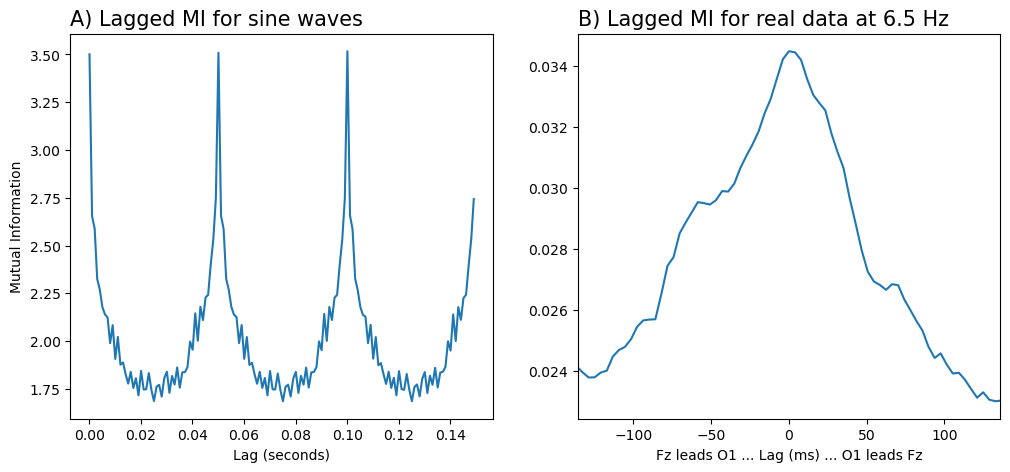

In [17]:
time = np.arange(0, 1.0001, 0.0001)
signal1 = np.sin(2 * np.pi * 10 * time)
signal2 = -signal1

lagz = np.arange(1, 1501, 10)
milags = np.zeros(lagz.shape)

for li, lag in enumerate(lagz):
    shifted_signal2 = np.roll(signal2, lag)
    milags[li] = mutualinformationx(signal1, shifted_signal2, 15)[0]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(lagz / (1 / np.mean(np.diff(time))), milags)
plt.setp(plt.gca(), 'xlabel', 'Lag (seconds)', 'ylabel', 'Mutual Information')
plt.title('A) Lagged MI for sine waves', loc='left', fontsize=15)

# Now on real data (6 Hz power MI from figure 11)
time = np.arange(-1, 1 + 1/srate, 1/srate)
fft_wavelet = np.fft.fft(np.exp(2*1j*np.pi*frex[4]*time) * np.exp(-time**2 / (2*(4/(2*np.pi*frex[4]))**2)), n_convolution)

# Convolution of each electrode with wavelet
convres = np.fft.ifft(fft_wavelet * fft_EEG1, n_convolution)
pow1 = np.log10(np.abs(np.reshape(convres[half_of_wavelet_size :-half_of_wavelet_size], [pnts, trials], order='F'))**2)
convres = np.fft.ifft(fft_wavelet * fft_EEG2, n_convolution)
pow2 = np.log10(np.abs(np.reshape(convres[half_of_wavelet_size :-half_of_wavelet_size], [pnts, trials], order='F'))**2)


onecycle = round(1000 / frex[5])
onecycleidx = round(onecycle / (1000 / srate))

lagz = np.arange(-onecycleidx, onecycleidx + 1)
milags = np.zeros(lagz.shape)


for li, lag in enumerate(lagz):
    if lag < 0:
        milags[li] = mutualinformationx(pow1[:lag, :], pow2[-lag:, :], 30)[0]
    elif lag == 0:
        milags[li] = mutualinformationx(pow1, pow2, 30)[0]
    else:
        milags[li] = mutualinformationx(pow1[lag:, :], pow2[:-lag, :], 30)[0]

plt.subplot(122)
plt.plot(1000 * lagz / (1 / np.mean(np.diff(time))), milags)
plt.setp(plt.gca(), 'xlabel', f'{electrodes4mi[0]} leads {electrodes4mi[1]} ... Lag (ms) ... {electrodes4mi[1]} leads {electrodes4mi[0]}', 'xlim', [-onecycle, onecycle])
_=plt.title('B) Lagged MI for real data at 6.5 Hz', loc='left', fontsize=15)